# IBM EDA Course Project

This document corresponds to both the code and the explanations for the final project of the IBM Exploratory Data Analysis Course. The dataset chosen is the "Titanic - Machine Learning from Disaster" training set. The choice was due to the recommendation of the Kaggle platform since it is the first Machine Learning challenge users usually get into. The goal is to develop machine learning algorithms to predict which passengers survived the Titanic disaster.

The dataset contains individual characteristics of each individual real passenger that embarked on the Titanic ship, which are considered to be our features, and the information if they survived or not is the intended prediction. The variables are:

* **Survived** (yes=1, no=0)
* **PassengerId** (Passenger Identification)
* **Name** (Passenger Name)
* **Age** (Passenger Age)
* **Sex** (Passenger Sex)
* **Fare** (Passenger Fare)
* **Ticket** (Ticket Number)
* **Pclass** (Ticket Class, 1 = 1st, 2 = 2nd, 3 = 3rd)
* **Cabin** (Cabin Number)
* **SibSp** (# of siblings / spouses aboard the Titanic)
* **Parch** (# of parents / children aboard the Titanic)
* **Embarked** (Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Titanic_Train.csv')
df.head() # Brief visualiation of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The initial plan to explore the data consists in first dealing with inherent data problems, such as missing data, outliers and duplicate values. Then, in order to better understand relations between the attributes and the target variable, some data viualisation is intended. Finally, if needed, any feature engineering might be performed, to possibly drop an unneeded variable, enhance correlations or put variables in scale for better comparation. To first explore the data we examine each attribute type and the number of non-null values.

## Data Cleaning

In [3]:
df.info() # Check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From this output we can see that the attributes "Age", "Cabin" and "Embarked" have missing data. Precisely, "Embarked", "Age" and "Cabin" have 2, 177 and 687 missing values, respectively. Due to the huge amount of missing values of "Cabin" and also the fact that its information is probably contained in the "Pclass" attribute (since cabins of a same class are usually closely located in ships), it is then dropped. 

In [4]:
df = df.drop(columns = "Cabin")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Even though the quantity of the "Age" category missing data is significant, which could lead to the impulsive action of dropping the whole attribute, the idea behind this feature and how they could relate to the target variable is discussed before commiting to a more drastic action. Intuitively, this variable can easily correlate to the survival of the passengers: The age can mean more experience and thus greater capability of taking self-care, or also can indicate the lack of physical capabilities from elder passengers. With this in mind, this feature is now analysed through an histogram. 

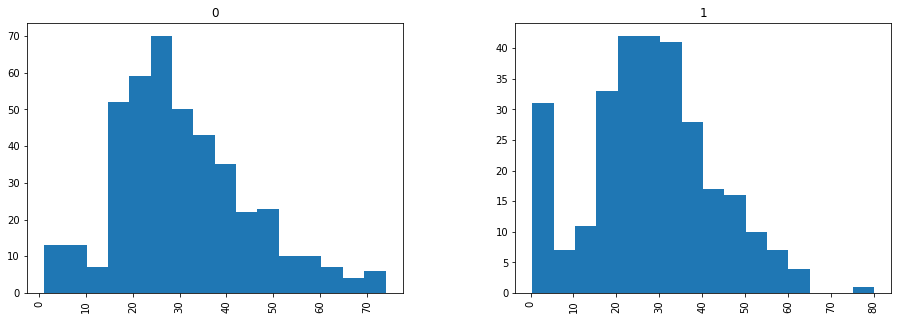

In [5]:
df.Age.hist(by=df.Survived, bins = 16, figsize = (15,5));

As expected, most of the passengers that survived are contained between 15 and 35 years. However, the total number of passengers is mostly contained on the exact same interval. So, there is not a clear idea of the proper behaviour, due to the non-uniformity of the total "Age" attribute. Thus, the most intuitive way to impute "Age" is through the attribute's median, since there is some skew on data, as stated (greater concentration on the 15-35yrs left side), in each separate case and also in the total histogram. Also, since the attribute "Embarked" is only missing two values, it is chosen to be imputed with its mode.

In [6]:
df.fillna(value = {'Age':df.Age.median(), 'Embarked':df.Embarked.mode().at[0]}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Now, with all missing data handled, the evaluation to check for duplicate entries is performed:

In [7]:
df_duplicates = df[df.duplicated()] # Checking duplicates via boolean mask
print(df_duplicates)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []


Thus, no duplicate is found. Which leads to the last step executed here for cleaning the data which is to find outliers, done using the statistical IQR method.

In [8]:
df_stats = df.describe()
df_stats.loc['range'] = df_stats.loc['75%'] - df_stats.loc['25%'] # Interquartile range 
df_stats.loc['min_for_out'] = df_stats.loc['25%'] - 1.5 * df_stats.loc['range'] # Minimum value to be considered outlier
df_stats.loc['max_for_out'] = df_stats.loc['75%'] + 1.5 * df_stats.loc['range'] # Maximum value to be considered outlier
out_cols = ['min_for_out','min','25%','50%','75%','range','max','max_for_out'] # Select interesting columns to display
df_stats = df_stats.loc[out_cols]
df_stats

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
min_for_out,-444.0,-1.5,0.5,2.50,-1.5,0.0,-26.7240
min,1.0,0.0,1.0,0.42,0.0,0.0,0.0000
25%,223.5,0.0,2.0,22.00,0.0,0.0,7.9104
50%,446.0,0.0,3.0,28.00,0.0,0.0,14.4542
75%,668.5,1.0,3.0,35.00,1.0,0.0,31.0000
range,445.0,1.0,1.0,13.00,1.0,0.0,23.0896
max,891.0,1.0,3.0,80.00,8.0,6.0,512.3292
max_for_out,1336.0,2.5,4.5,54.50,2.5,0.0,65.6344


Which indicates the possibility of outliers on the "Age", "SibS", "Parch", and "Fare" columns. We plot the histogram of each of these attributes in order to visualize if it is indeed the case.

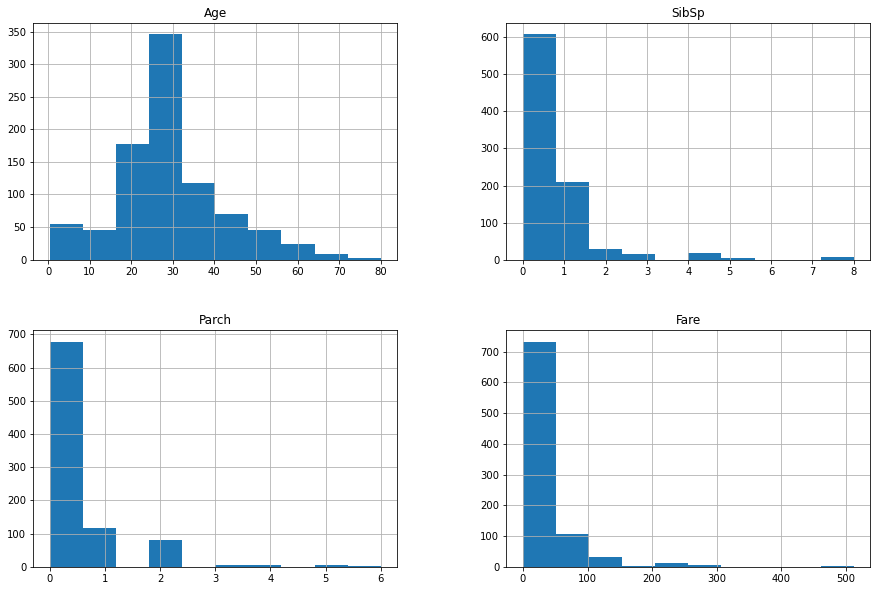

In [9]:
df.hist(["Age","SibSp","Parch","Fare"], figsize = (15,10));

Since all the outliers visualized seem to be "grouped", that is, are not isolated cases, they are kept, because instead of a scale mistake, they might be representing a particular characteristic of a select group of people.